# Universal approximation theorem and manual weights optimization

http://neuralnetworksanddeeplearning.com/chap4.html

In [2]:
import os
os.chdir('..')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import miowad.nn as nn
from miowad.data import RegressionDataset
from miowad.nn.viz import visualize_nn
from miowad.utils import set_seed

from ipywidgets import interactive
from IPython.display import display

%matplotlib inline
set_seed(123)

In [9]:
from miowad.metrics import mean_squared_error

def evaluate_regression(model, X_train, y_train, X_test, y_test, X_scaler, y_scaler):

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    # unnormalize predictions
    if y_scaler is not None:
        preds_train = y_scaler.inverse_transform(preds_train)
        preds_test = y_scaler.inverse_transform(preds_test)

    # unnormalize data
    if X_scaler is not None and y_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train)
        X_test = X_scaler.inverse_transform(X_test)
        y_train = y_scaler.inverse_transform(y_train)
        y_test = y_scaler.inverse_transform(y_test)

    print("Training MSE: {:.2f}".format(mean_squared_error(y_train, preds_train)))
    print("Test MSE: {:.2f}".format(mean_squared_error(y_test, preds_test)))
    print("-"*10)

In [10]:
from miowad.metrics import mean_squared_error

def plot_preds_regression(model, X_train, y_train, X_test, y_test, X_scaler=None, y_scaler=None):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    # unnormalize predictions
    if y_scaler is not None:
        preds_train = y_scaler.inverse_transform(preds_train)
        preds_test = y_scaler.inverse_transform(preds_test)

    # unnormalize data
    if X_scaler is not None and y_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train)
        X_test = X_scaler.inverse_transform(X_test)
        y_train = y_scaler.inverse_transform(y_train)
        y_test = y_scaler.inverse_transform(y_test)


    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)

    ax1.scatter(X_train, y_train, label='ground truth')
    ax1.scatter(X_train, preds_train, label='preds')
    ax1.set_title(f"Train MSE: {mse_train:.2f}")
    ax1.legend()

    ax2.scatter(X_test, y_test, label='ground truth')
    ax2.scatter(X_test, preds_test, label='preds')
    ax2.set_title(f"Test MSE: {mse_test:.2f}")
    ax2.legend()

In [11]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return np.exp(x) / (1 + np.exp(x))

In [12]:
def plot_neuron(w: float, b: float):
    plt.figure(figsize=(6, 4))
    x = np.linspace(0, 1, 1000)
    y = nn.sigmoid(x * w + b)
    plt.plot(x, y, label=f"w={w}, b={b}")
    plt.show()

In [13]:
w = interactive(plot_neuron, w=(-50, 50), b=(-50, 50))

In [15]:
display(w)

interactive(children=(IntSlider(value=0, description='w', max=50, min=-50), IntSlider(value=0, description='b'…

## square-simple

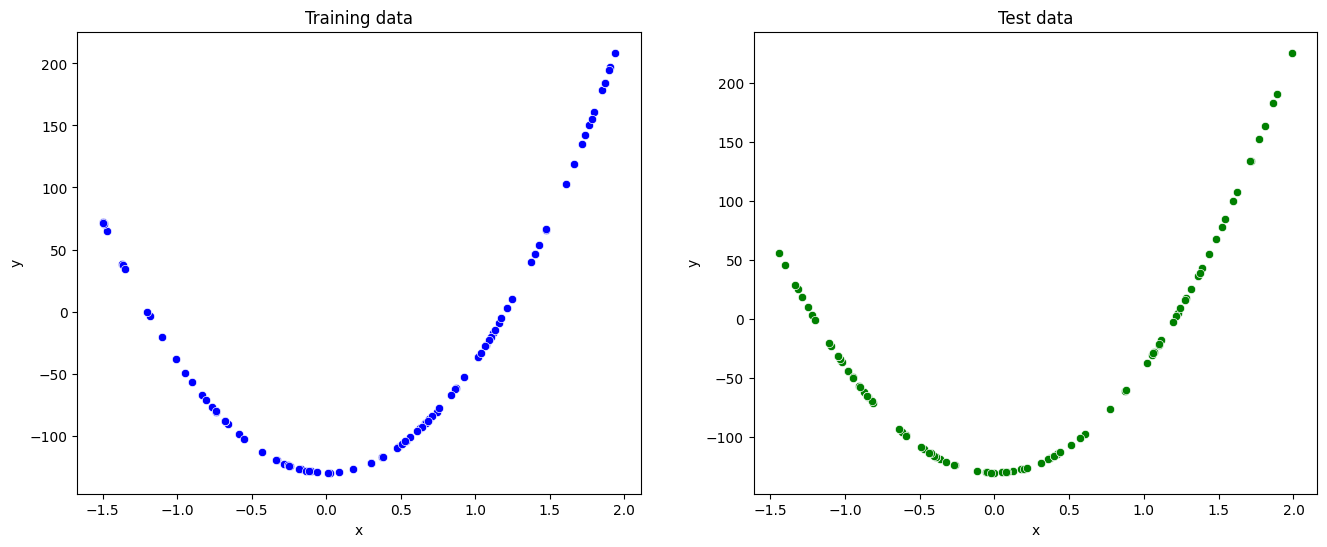

In [16]:
square_simple = RegressionDataset('square-simple')
square_simple.plot_dataset()

In [17]:
square_simple_train, square_simple_test = square_simple.to_df()

X_train, y_train = square_simple_train['x'].values.reshape(-1, 1), square_simple_train['y'].values.reshape(-1, 1)
X_test, y_test = square_simple_test['x'].values.reshape(-1, 1), square_simple_test['y'].values.reshape(-1, 1)

### 5 neurons

In [18]:
model = nn.Sequential([
    nn.Linear(1, 5),
    nn.Sigmoid(),
    nn.Linear(5, 1),
])

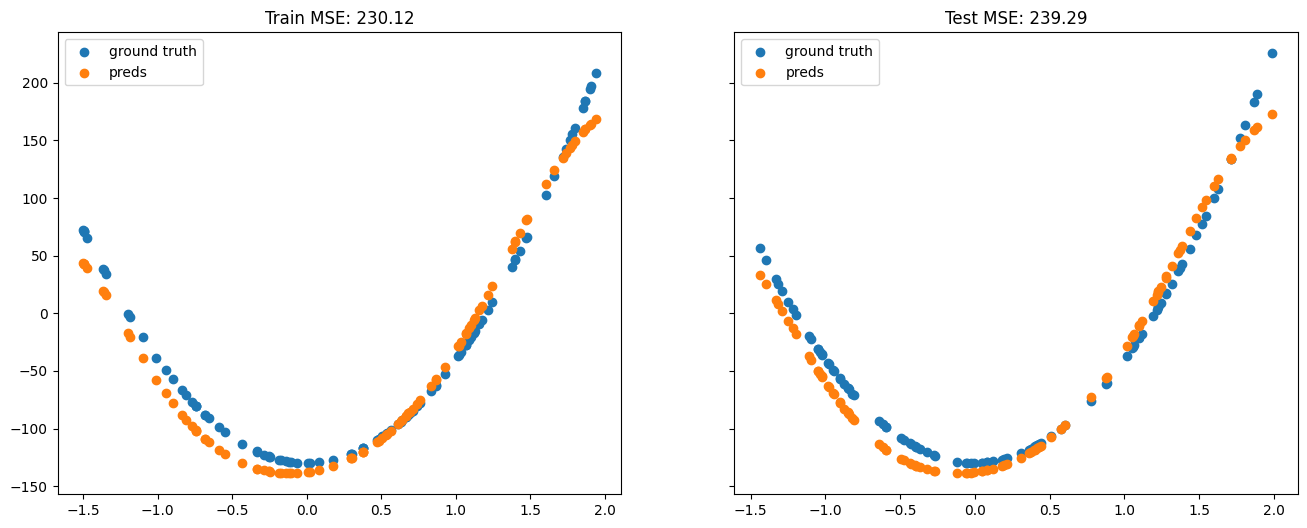

In [19]:
model.parameters[0].weights = np.array([[-4, -4, 4, 4, 4]])
model.parameters[0].biases = np.array([-5, -3, -2, -4, -6])
model.parameters[1].weights = np.array([[200], [50], [50], [100], [200]])
model.parameters[1].biases = np.array([-150])
plot_preds_regression(model, X_train, y_train, X_test, y_test)

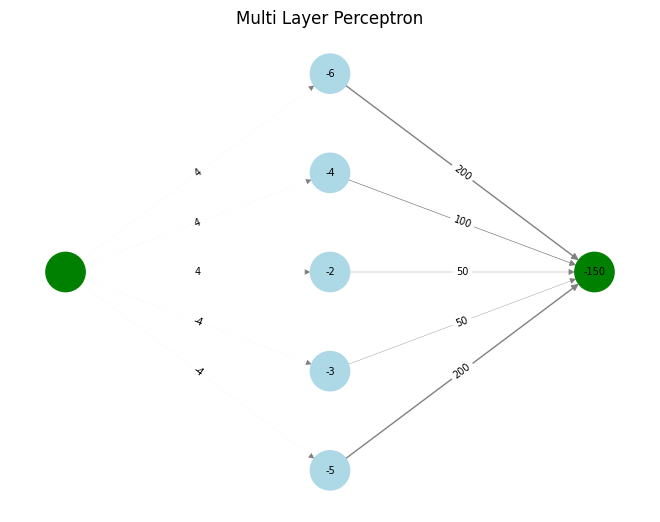

In [20]:
visualize_nn(model)

### 10 neurons

In [21]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])

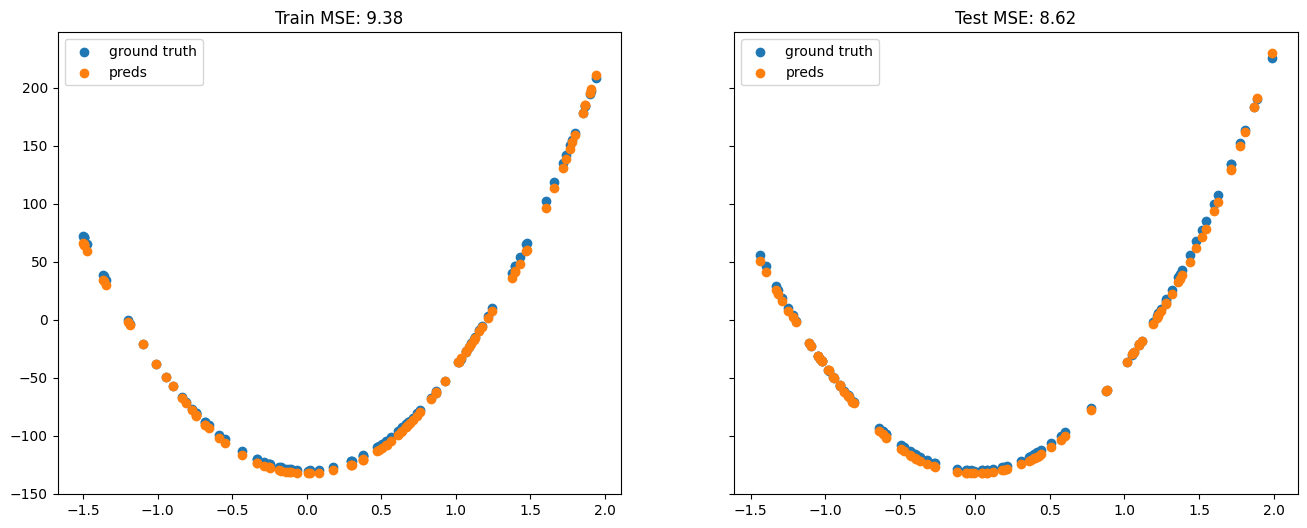

In [22]:
model.parameters[0].weights = np.array([[-3, -4, -4, -4, -4, 4, 4, 4, 4, 3]])
model.parameters[0].biases = np.array([-6, -4, -3, -2, -1, -1, -2, -3, -4, -6])
model.parameters[1].weights = np.array([[500], [70], [50], [10], [1], [1], [10], [50], [70], [500]])
model.parameters[1].biases = np.array([-145])
plot_preds_regression(model, X_train, y_train, X_test, y_test)

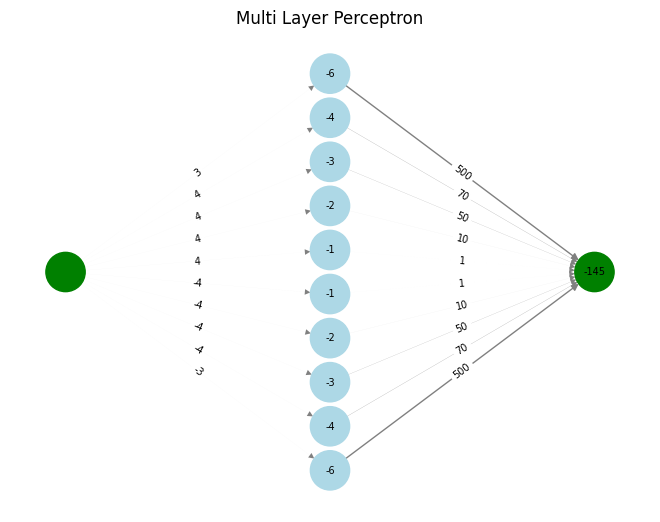

In [23]:
visualize_nn(model)


## steps-large

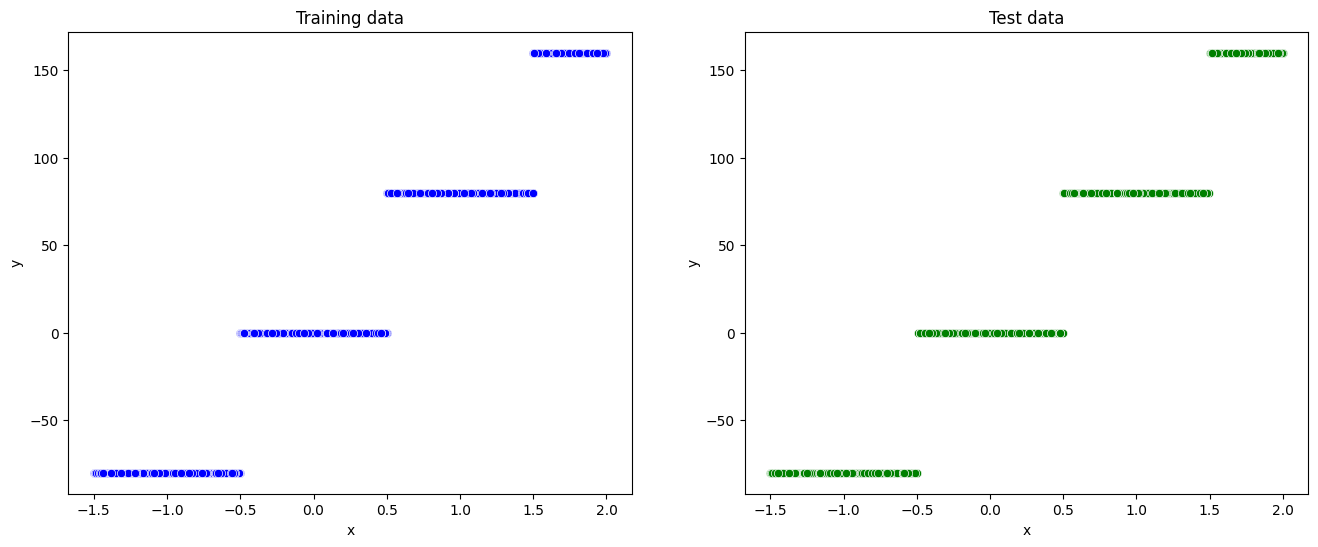

In [24]:
steps_large = RegressionDataset('steps-large')
steps_large.plot_dataset()

In [25]:
steps_large_train, steps_large_test = steps_large.to_df()

X_train, y_train = steps_large_train['x'].values.reshape(-1, 1), steps_large_train['y'].values.reshape(-1, 1)
X_test, y_test = steps_large_test['x'].values.reshape(-1, 1), steps_large_test['y'].values.reshape(-1, 1)

In [26]:
model = nn.Sequential([
    nn.Linear(1, 5),
    nn.Sigmoid(),
    nn.Linear(5, 1),
])

In [1]:
import numpy as np

In [5]:
np.random.randint(0, 3, size=(100, 1))

array([[0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
    

/Users/mikolajpiorczynski/Projects/neural-networks-from-scratch/miowad/nn/activations.py:54: RuntimeWarning: overflow encountered in exp
  self.outputs = np.where(x > 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))
/Users/mikolajpiorczynski/Projects/neural-networks-from-scratch/miowad/nn/activations.py:54: RuntimeWarning: invalid value encountered in divide
  self.outputs = np.where(x > 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))


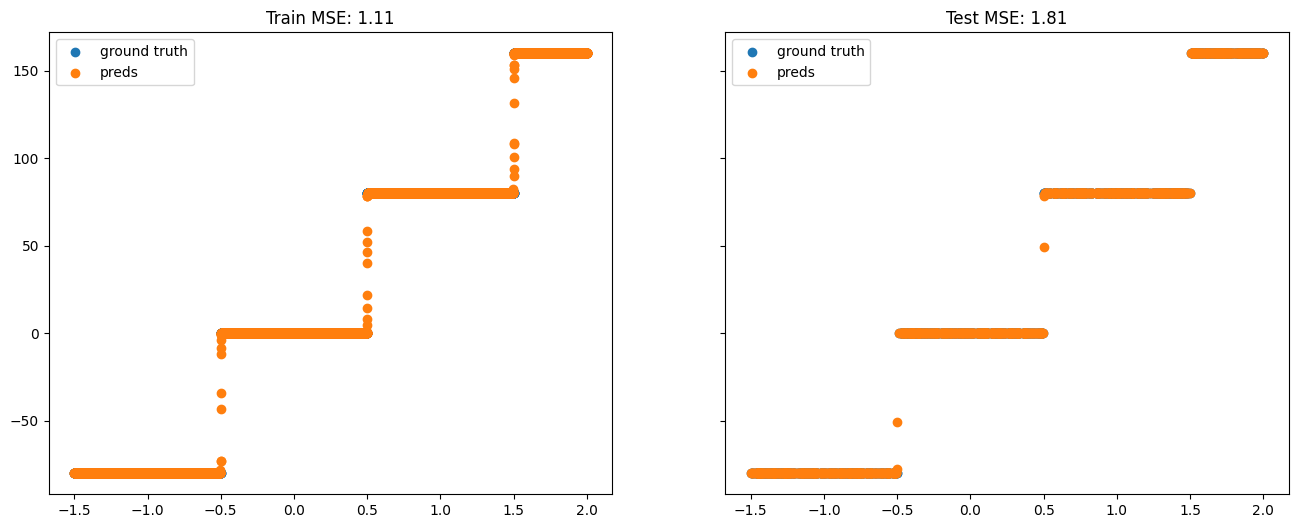

In [27]:
model.parameters[0].weights = np.array([[2000, 2000, 2000, 2000, 2000]])
model.parameters[0].biases = np.array([1000, -1000, -3000, 0, 0])
model.parameters[1].weights = np.array([[80], [80], [80], [0], [0]])
model.parameters[1].biases = np.array([-80])
plot_preds_regression(model, X_train, y_train, X_test, y_test)

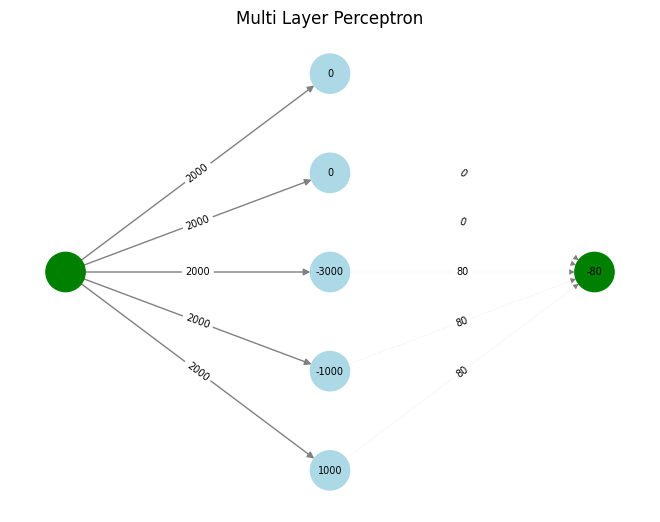

In [28]:
visualize_nn(model)